In [1]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_metric(model, X, y):
    y_pred = model.predict(X)
    MAE = mean_absolute_error(y, y_pred) #MAE
    accuracy = [y_expected == y_predicted for y_expected, y_predicted in zip(y, y_pred)] #acc
    accuracy_score = accuracy.count(True) / len(accuracy) #acc%
    accuracy_p_m_1 = [y_predicted - 1 <= y_expected <= y_predicted + 1 for y_expected, y_predicted in zip(y, y_pred)] #acc +/- 1
    accuracy_p_m_1_score = accuracy_p_m_1.count(True) / len(accuracy_p_m_1) #acc_b
    return MAE, accuracy_score, accuracy_p_m_1_score

def normalize(df: pd.DataFrame):
    expected = {"school": ["GP", "MS"],
                "sex": ["F", "M"],
                "address": ["U", "R"],
                "famsize": ["LE3", "GT3"],
                "Pstatus": ["T", "A"],
                "Mjob": ["teacher", "health", "services", "at_home", "other"],
                "Fjob": ["teacher", "health", "services", "at_home", "other"],
                "reason": ["home", "reputation", "course", "other"],
                "guardian": ["mother", "father", "other"],
                "schoolsup": ["yes", "no"],
                "famsup": ["yes", "no"],
                "paid": ["yes", "no"],
                "activities": ["yes", "no"],
                "nursery": ["yes", "no"],
                "higher": ["yes", "no"],
                "internet": ["yes", "no"],
                "romantic": ["yes", "no"]}
    for key, values in expected.items():
        df[key].replace(values, range(0, len(values)), inplace=True)
    return df


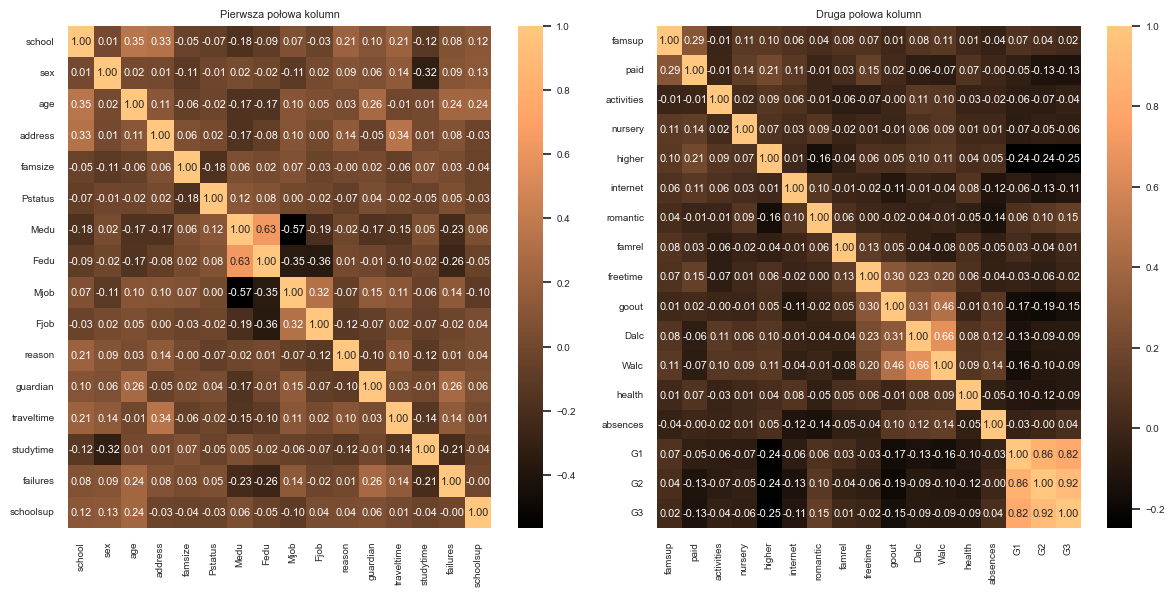

In [2]:
data = pd.read_csv("student-matA.csv", delimiter=";")
data_no_norm = data
normalize(data)

X_train, X_test, y_train, y_test = train_test_split(data, data["G3"], test_size=0.3, random_state=304732)
heat_data = X_train
sns.set(font_scale=0.65)

# Tworzenie dwóch subplotów
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Pierwszy subplot - pierwsza połowa kolumn
sns.heatmap(heat_data.iloc[:, :int(heat_data.shape[1] / 2)].corr(), annot=True, cmap="copper", yticklabels=True, fmt=".2f", ax=ax1)
ax1.set_title("Pierwsza połowa kolumn")

# Drugi subplot - druga połowa kolumn
sns.heatmap(heat_data.iloc[:, int(heat_data.shape[1] / 2):].corr(), annot=True, cmap="copper", yticklabels=True, fmt=".2f", ax=ax2)
ax2.set_title("Druga połowa kolumn")

plt.tight_layout()
plt.show()

In [3]:
decision_tree = tree.DecisionTreeClassifier()

independent_columns = [["All columns",["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", 
"guardian", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", "activities", 
"nursery", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", 
"absences"]],
["Fedu Rejection", ["age", "famrel", "Medu", "freetime", "goout", "Walc", "health", "Fjob", 
"studytime", "schoolsup", "traveltime"]], 
[ "Medu and Fedu Replacement", ["sex", "famsize", "failures", "nursery", "goout"]],
[ "Absences Adding", ["sex", "famsize","failures", "nursery", "goout", "absences"]],
["Final collumns", ["famsize", "nursery", "failures","goout","absences","school"]] ]

for label, columns in independent_columns:
    X_train, X_test, y_train, y_test = train_test_split(data[[col for col in columns]],data["G3"], test_size=0.3, random_state=304732)
    decision_tree.fit(X_train, y_train)
    MAE, acc, acc_b = calc_metric(decision_tree, X_test, y_test)
    print(label)
    print("MAE: {}, Accuracy: {}, Accuracy +/- 1: {}\n".format(MAE, acc, acc_b))

All columns
MAE: 3.899159663865546, Accuracy: 0.08403361344537816, Accuracy +/- 1: 0.2605042016806723

Fedu Rejection
MAE: 4.4033613445378155, Accuracy: 0.09243697478991597, Accuracy +/- 1: 0.2689075630252101

Medu and Fedu Replacement
MAE: 4.26890756302521, Accuracy: 0.06722689075630252, Accuracy +/- 1: 0.24369747899159663

Absences Adding
MAE: 4.46218487394958, Accuracy: 0.10084033613445378, Accuracy +/- 1: 0.2689075630252101

Final collumns
MAE: 4.084033613445378, Accuracy: 0.13445378151260504, Accuracy +/- 1: 0.3277310924369748



In [4]:
decision_tree = tree.DecisionTreeRegressor()

independent_columns = [["All columns",["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", 
"guardian", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", "activities", 
"nursery", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", 
"absences"]],
["Fedu Rejection", ["age", "famrel", "Medu", "freetime", "goout", "Walc", "health", "Fjob", 
"studytime", "schoolsup", "traveltime"]], 
[ "Medu and Fedu Replacement", 
['sex', 'famsize', 'failures', 'nursery', 'goout']],
[ "Absences Adding", ['sex', 'famsize','failures', 'nursery', 'goout', 'absences']],
["Final collumns", ["famsize", "nursery", "failures","goout","absences","school"]] ]

for label, columns in independent_columns:
    X_train, X_test, y_train, y_test = train_test_split(data[[col for col in columns]], data["G3"], test_size=0.3, random_state=304732)
    decision_tree.fit(X_train, y_train)
    MAE, acc, acc_b = calc_metric(decision_tree, X_train, y_train)
    print(label)
    print("MAE: {}, Accuracy: {}, Accuracy +/- 1: {}\n".format(MAE, acc, acc_b))

All columns
MAE: 0.0, Accuracy: 1.0, Accuracy +/- 1: 1.0

Fedu Rejection
MAE: 0.0, Accuracy: 1.0, Accuracy +/- 1: 1.0

Medu and Fedu Replacement
MAE: 2.5850367024280065, Accuracy: 0.12318840579710146, Accuracy +/- 1: 0.31521739130434784

Absences Adding
MAE: 1.2342995169082125, Accuracy: 0.5579710144927537, Accuracy +/- 1: 0.6739130434782609

Final collumns
MAE: 1.3998274672187716, Accuracy: 0.48188405797101447, Accuracy +/- 1: 0.605072463768116



In [5]:
ada = AdaBoostRegressor()

independent_columns = [["All columns",["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", 
"guardian", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", "activities", 
"nursery", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", 
"absences"]],
["Fedu Rejection", ["age", "famrel", "Medu", "freetime", "goout", "Walc", "health", "Fjob", 
"studytime", "schoolsup", "traveltime"]], 
[ "Medu and Fedu Replacement", 
['sex', 'famsize', 'failures', 'nursery', 'goout']],
[ "Absences Adding", ['sex', 'famsize','failures', 'nursery', 'goout', 'absences']],
["Final collumns", ["famsize", "nursery", "failures","goout","absences","school"]] ]
for label, columns in independent_columns:
    X_train, X_test, y_train, y_test = train_test_split(data[[col for col in columns]],data["G3"], test_size=0.3, random_state=304732)
    ada.fit(X_test, y_test)
    MAE, acc, acc_b = calc_metric(ada, X_train, y_train)
    print(label)
    print("MAE: {}, Accuracy: {}, Accuracy +/- 1: {} \n".format(MAE, acc, acc_b))


All columns
MAE: 3.316569929318272, Accuracy: 0.0036231884057971015, Accuracy +/- 1: 0.2028985507246377 

Fedu Rejection
MAE: 3.7554935433757772, Accuracy: 0.010869565217391304, Accuracy +/- 1: 0.213768115942029 

Medu and Fedu Replacement
MAE: 3.426295374735436, Accuracy: 0.021739130434782608, Accuracy +/- 1: 0.2210144927536232 

Absences Adding
MAE: 3.4446246153326157, Accuracy: 0.0036231884057971015, Accuracy +/- 1: 0.16666666666666666 

Final collumns
MAE: 3.5684252119917153, Accuracy: 0.0036231884057971015, Accuracy +/- 1: 0.19927536231884058 



In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, data["G3"], test_size=0.3, random_state=304732)

test_cases = [["remove some columns",
 X_train.drop(["G1","G2","G3","age","famrel","Medu","freetime","goout","Walc","health","Fjob","studytime","schoolsup","traveltime","Fedu",], axis=1,),],
 ["\ngreatest correlation with others",
 X_train[["age","famrel","Medu","freetime","goout","Walc","health","Fjob","studytime","schoolsup","traveltime","absences","failures","Fedu",]],],
 ["\ngrates correlation with G3",
 X_train[["sex","age","Medu","Fedu","Mjob","failures","paid","higher","goout",]],],
 ["\nMedu and Fedu Replacement",
 X_train[["sex", "famsize", "failures", "nursery", "goout"]],],
 ["\nAbsences Adding",
 X_train[["sex", "famsize", "nursery", "failures", "goout", "absences"]],],
 ["\nFinal collumns",
 X_train[["famsize", "nursery", "failures", "goout", "absences", "school"]],],]

for label, vif_data in test_cases:
    vif = pd.DataFrame()
    vif["features"] = vif_data.columns
    vif["vif_Factor"] = [
    variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    print(label)
    print(vif)

remove some columns
      features  vif_Factor
0       school    1.404811
1          sex    2.440864
2      address    1.573953
3      famsize    3.367767
4      Pstatus    1.173020
5         Mjob    4.292117
6       reason    2.751955
7     guardian    1.619201
8     failures    1.704240
9       famsup    1.896702
10        paid    2.612596
11  activities    2.111055
12     nursery    1.382137
13      higher    1.380223
14    internet    1.395222
15    romantic    2.923729
16        Dalc    4.535801
17    absences    1.567816

greatest correlation with others
      features  vif_Factor
0          age   67.059414
1       famrel   22.124328
2         Medu   12.850029
3     freetime   13.898591
4        goout   12.437634
5         Walc    6.166954
6       health    7.216381
7         Fjob    7.114682
8    studytime    7.923606
9    schoolsup    9.363112
10  traveltime    5.886028
11    absences    1.632480
12    failures    1.599554
13        Fedu   12.380902

grates correlation with G3


In [7]:
data = data_no_norm
grouped_data = data.groupby(["school", "sex"])
grouped_data["G3"].mean()

school  sex
0       0       9.972678
        1      11.060241
1       0       9.920000
        1       9.761905
Name: G3, dtype: float64

In [8]:
data = data_no_norm
grouped_data = data.groupby(["Medu", "Fedu"])
grouped_data["G3"].mean()

Medu  Fedu
0     1        9.000000
      2       15.000000
1     0       16.000000
      1        8.297297
      2        9.333333
      3        7.200000
      4       13.000000
2     1        9.214286
      2        9.333333
      3       10.529412
      4       12.714286
3     1       11.266667
      2       10.321429
      3       10.236842
      4        9.611111
4     0       10.000000
      1        8.000000
      2       12.894737
      3       11.550000
      4       11.657143
Name: G3, dtype: float64

In [9]:
data = data_no_norm
grouped_data = data.groupby(["failures", "schoolsup"])
grouped_data["G3"].mean()

failures  schoolsup
0         0             9.550000
          1            11.503676
1         0             9.571429
          1             7.883721
2         0             6.000000
          1             6.266667
3         0            10.000000
          1             5.071429
Name: G3, dtype: float64

In [10]:
data = data_no_norm
grouped_data = data.groupby(["activities", "internet"])
grouped_data["G3"].mean()

activities  internet
0           0           10.637427
            1            9.633333
1           0           10.594937
            1            9.222222
Name: G3, dtype: float64

In [11]:
data = data_no_norm
pd.set_option('display.max_rows', None)
grouped_data = data.groupby(["health", "absences"])
print(grouped_data["G3"].mean())

health  absences
1       0           12.000000
        2           12.555556
        4           12.833333
        5           16.000000
        6           11.500000
        7           15.500000
        8           10.000000
        10          13.000000
        12          11.000000
        13          17.000000
        14           8.500000
        16           8.000000
        17          10.000000
        22           7.500000
        56           8.000000
2       0            4.666667
        2           13.333333
        3           16.000000
        4           11.727273
        5           19.000000
        6           12.666667
        8           10.000000
        9           15.000000
        10          10.333333
        14           9.000000
        16          12.000000
        20          13.000000
        21          18.000000
        24          18.000000
        26           6.000000
3       0            8.000000
        1           12.000000
        2           11.